In [1]:
import numpy as np
import matplotlib.pyplot as plt

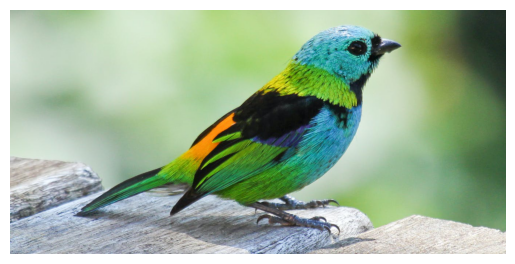

In [2]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# URL of the image
image_url = "https://images.theconversation.com/files/456350/original/file-20220405-6157-c2dbrq.jpeg?ixlib=rb-1.1.0&rect=20%2C287%2C2287%2C1142&q=45&auto=format&w=1356&h=668&fit=crop"

# Download the image from the URL
response = requests.get(image_url)
img_data = response.content

# Load the image using PIL
image = Image.open(BytesIO(img_data))

# Display the image
plt.imshow(image)
plt.axis('off') 
plt.show()


In [3]:
image_array = np.array(image)

In [4]:
print("Shape of original_img is:", image_array.shape)

Shape of original_img is: (668, 1356, 3)


In [5]:
X_img = np.reshape(image_array, (image_array.shape[0] * image_array.shape[1], 3))

In [6]:
def find_closest_centroids(X, centroids):

    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
       
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j]) 
            distance.append(norm_ij)
    
        
        idx[i] = np.argmin(distance)
    return idx

In [7]:
def compute_centroids(X, idx, K):
  
  
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
 
    for k in range(K):
        points =  X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
    return centroids

In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
   
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [9]:
def kMeans_init_centroids(X, K):
    
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [ ]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
    

K-Means iteration 0/9


In [34]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (905808,)
Closest centroid for the first five elements: [9 7 7 7 7]


In [36]:
def plot_kMeans_RGB(X_img, centroids, idx, K):
    # Reshape the data back to its original image shape
    img_shape = (image_array.shape[0], image_array.shape[1], 3)
    clustered_img = np.zeros(img_shape)

    # Assign each pixel its corresponding centroid color
    for i in range(len(idx)):
        clustered_img[i // img_shape[1], i % img_shape[1]] = centroids[idx[i]]

    # Plot the original image and the clustered image side by side
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_array)
    plt.title("Original Image")
    plt.axis('off')

    # Plot the clustered image
    plt.subplot(1, 2, 2)
    plt.imshow(clustered_img.astype(np.uint8))
    plt.title(f"K-means Clustering (K={K})")
    plt.axis('off')

    plt.show()


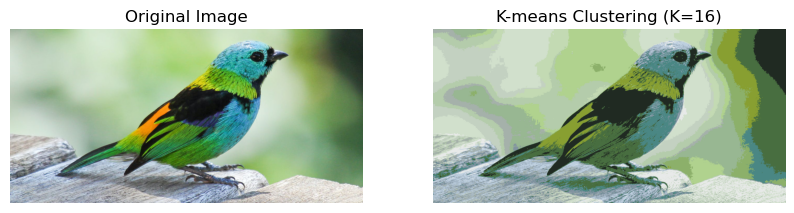

In [37]:
plot_kMeans_RGB(X_img, centroids, idx, K)